Dataset Link
As the dataset size is we have attached the link and source for the dataset

https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

# **1. Data Extraction**

In [ ]:
# Import all the necessary Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import operator as op

from sklearn.impute import SimpleImputer

import seaborn as sns
sns.set(rc={'figure.figsize': (12,8)})

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score


In [ ]:
# Import the dataset
df = pd.read_csv('household_power_consumption.txt',sep=";")

<ipython-input-56-1456df4a01d9>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt',sep=";")


In [ ]:
# Get the shape of the dataset
df.shape

(2075259, 9)

In [ ]:
# Get all the columns in the dataset
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
# Check the datatype of each column
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [ ]:
# Check the dataframe
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# Define the target column and predictors columns
TARGET = "Global_active_power"
columns_predictors = [col for col in df.columns if col not in [TARGET]]

print(f"TARGET: {TARGET}")
print(f"Columns predictors: {columns_predictors}")


TARGET: Global_active_power
Columns predictors: ['Date', 'Time', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


# **2. Data Validation and Cleansing**

## **Handling missing value**

In [ ]:
# Count the number of null values
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
# The total number of rows in df that contain at least one missing value
df.isnull().any(axis = 1).sum()

25979

In [ ]:
# m and n are assigned the number of rows and columns
m, n = df.shape

# Computes the total number of missing values in the DataFrame using df.isnull().sum().sum()
# Divides this total by the number of rows (m) and assigns the result to the variable df_per
df_per = (df.isnull().sum().sum())/m
col_pers = {}

# Determines the number of missing values in the current column (i)
for i in df.columns:
    col_pers[i] = (df[i].isnull().sum())/m

print(df_per)
print(col_pers)

0.012518437457686004
{'Date': 0.0, 'Time': 0.0, 'Global_active_power': 0.0, 'Global_reactive_power': 0.0, 'Voltage': 0.0, 'Global_intensity': 0.0, 'Sub_metering_1': 0.0, 'Sub_metering_2': 0.0, 'Sub_metering_3': 0.012518437457686004}


## **Converting the data type of the columns**

In [ ]:
# Replace the missing value with nan
df.replace(['?', 'nan', np.nan], -1, inplace=True)


num_vars= ['Global_active_power', 'Global_reactive_power', 'Voltage',
           'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Convert the columns data type
for i in num_vars:
    df[i] = pd.to_numeric(df[i])

# Use Simple Imputer for Mean imputation
imp = SimpleImputer(missing_values=-1, strategy='mean')
df[num_vars] = imp.fit_transform(df[num_vars])

In [ ]:
# Count the number of null values
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


# **3. Visualization**

## **Historgram**

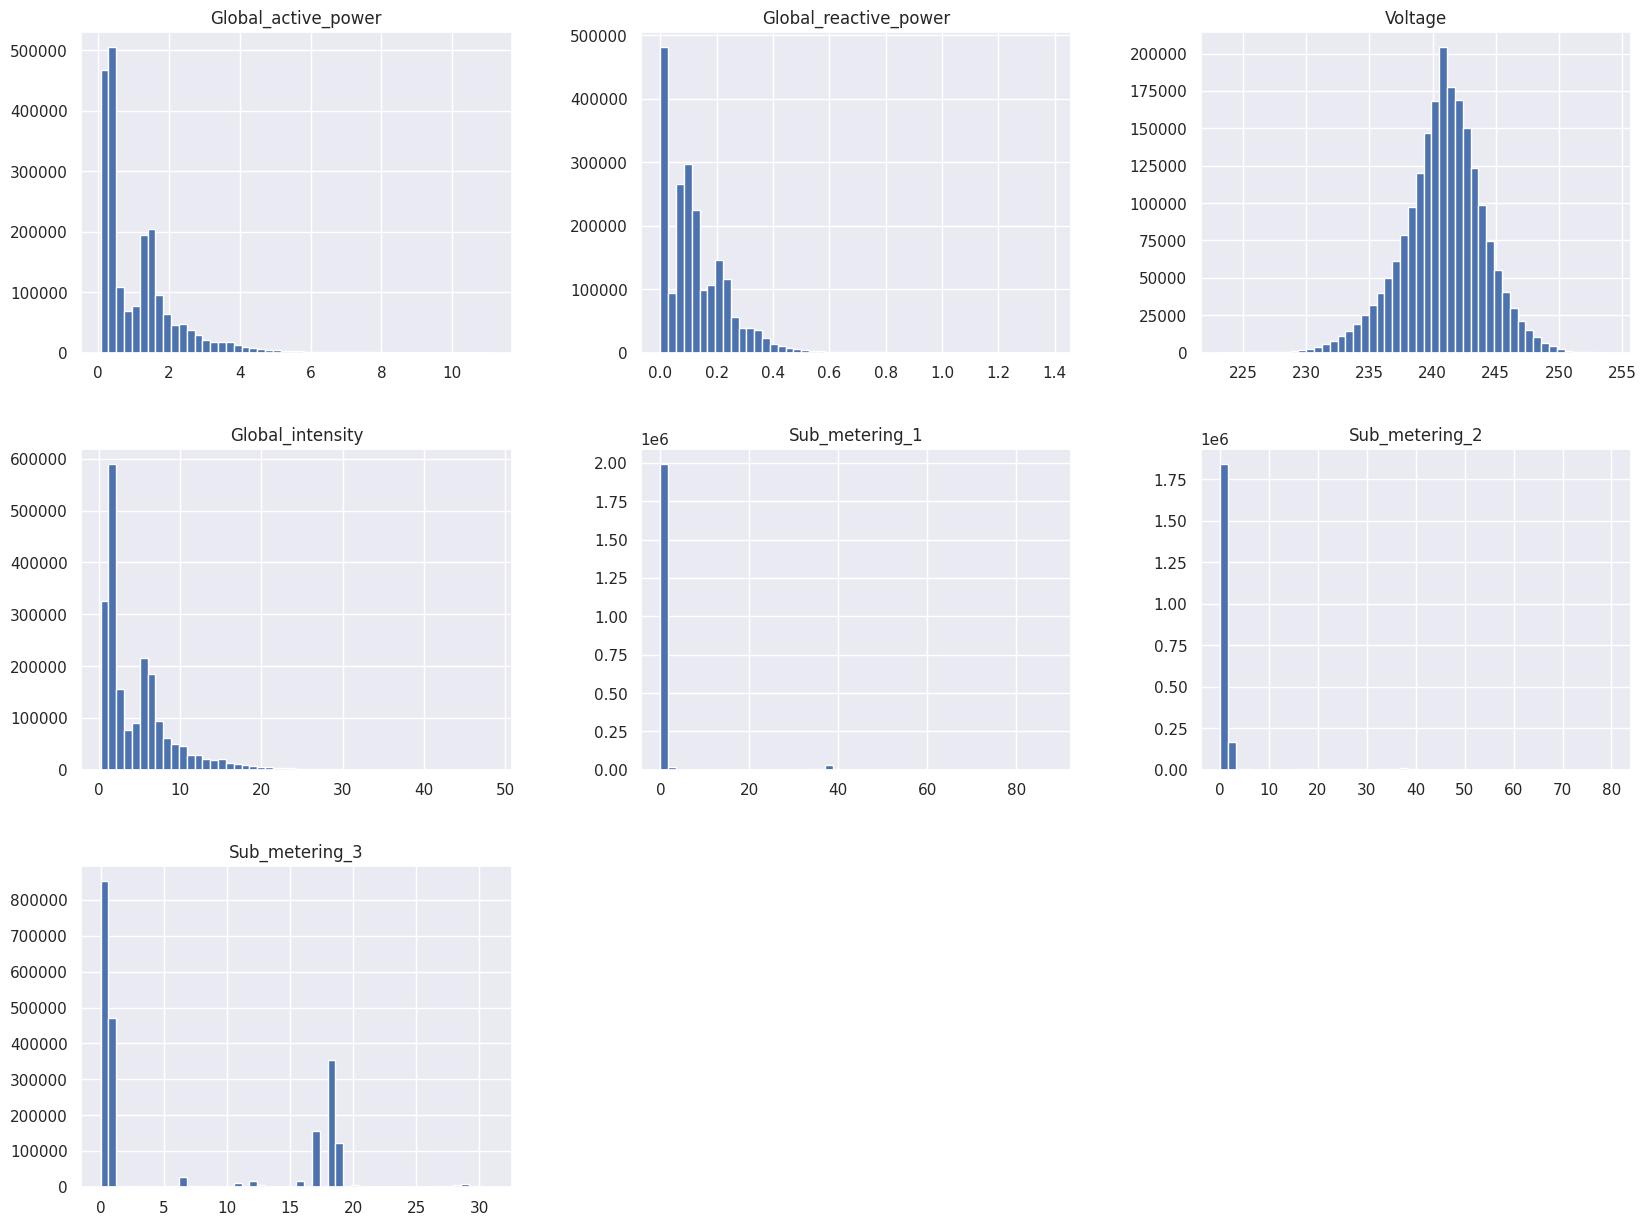

In [ ]:
#Part 1 - Explore the data - Credit Cards
df.hist(bins=50, figsize=(20,15))
plt.show()

## **Correlation**

<ipython-input-69-5bfe538fc3e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.corrcoef(df.corr())
<ipython-input-69-5bfe538fc3e5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, mask=mask)


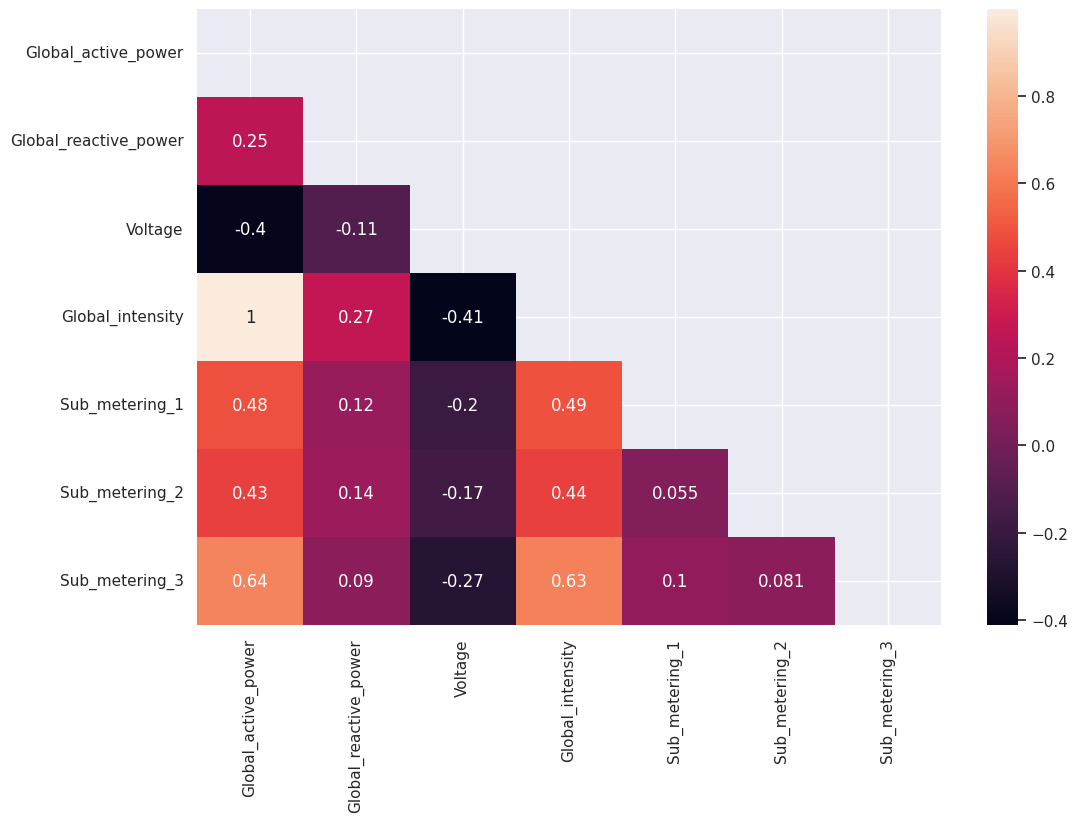

In [ ]:
corr = np.corrcoef(df.corr())
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, mask=mask)
plt.show()

## **Scatter plot**

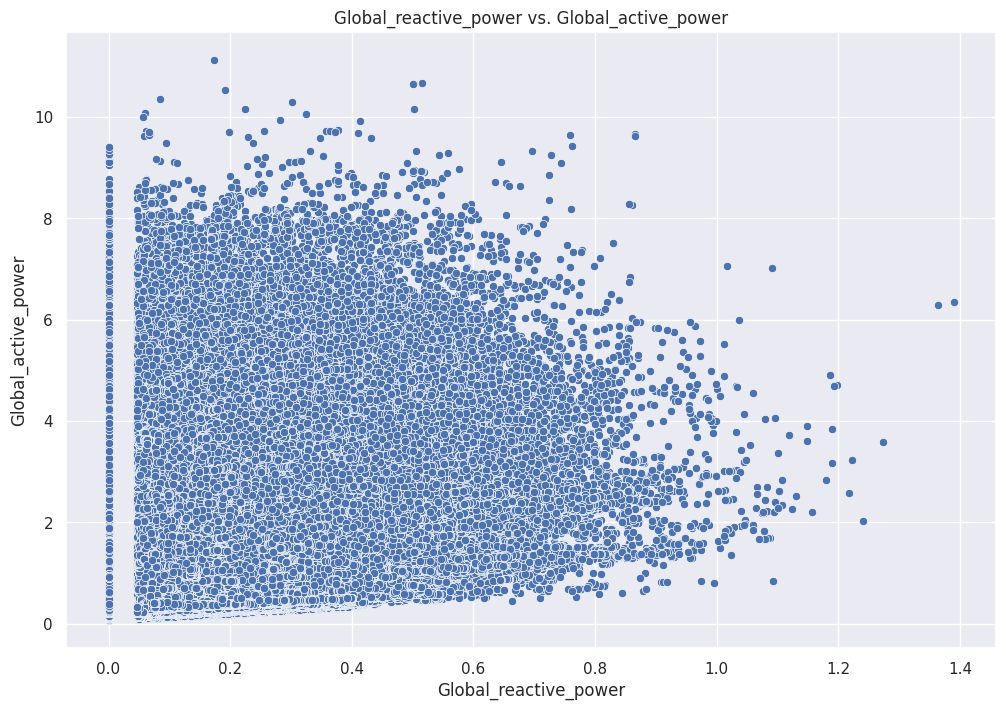

In [ ]:
# Scatter plot
ax = sns.scatterplot(x="Global_reactive_power", y="Global_active_power", data=df)
ax.set_title("Global_reactive_power vs. Global_active_power")
ax.set_xlabel("Global_reactive_power");

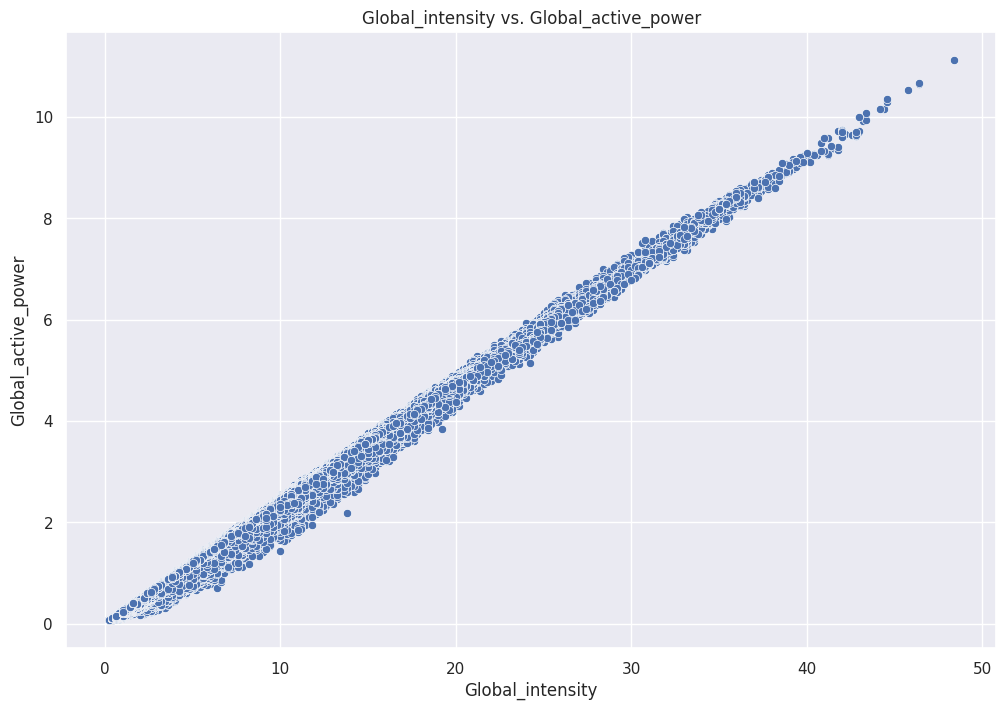

In [ ]:
# Scatter plot
ax = sns.scatterplot(x="Global_intensity", y="Global_active_power", data=df)
ax.set_title("Global_intensity vs. Global_active_power")
ax.set_xlabel("Global_intensity");

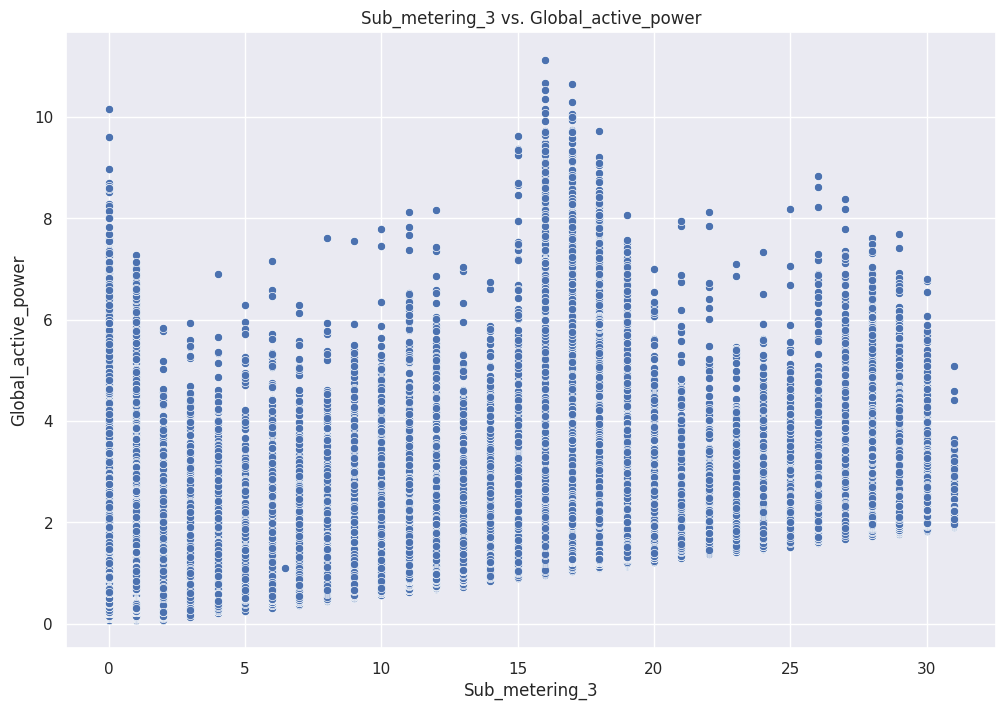

In [ ]:
# Scatter plot
ax = sns.scatterplot(x="Sub_metering_3", y="Global_active_power", data=df)
ax.set_title("Sub_metering_3 vs. Global_active_power")
ax.set_xlabel("Sub_metering_3");

# **4. Analysis**

## **Training the baseline model**

In [ ]:
# Feature selection
X = df.drop(['Date', 'Time','Global_active_power'], axis=1)

# Target variable selection
y = df[['Global_active_power']]

In [ ]:
# Data splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
model.score(X_train, y_train)
model.score(X_test, y_test)


y_pred =model.predict(X_test)
score = r2_score(y_test,y_pred)
print("Prediction score for baseline model", score)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Prediction score for baseline model 0.9985177627808611
Mean Squared Error: 0.0016344088846768083


## **Cross validation**

In [ ]:
# Using K-Fold Cross Validation methodology
print(cross_val_score(model, X_train, y_train, cv=5))

[0.99853879 0.9985365  0.99852595 0.99849477 0.99853162]


## **Baseline model without Global_intensity**

In [ ]:
"""
Our ttraget variable Global_active_power and the feature named Global_intensity have a correlation of 1.
Our baseline model performs exceptionally well, which is unusual in modelling, when the Global_intensity is included as one of the features for training.
Therefore, in each modelling scenario, we train the model with and without the Global_intensity.

"""

In [ ]:
# Feature selection
X = df.drop(['Date', 'Time','Global_active_power','Global_intensity'], axis=1)

# Target variable selection
y = df[['Global_active_power']]

In [ ]:
# Data splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
model.score(X_train, y_train)
model.score(X_test, y_test)


y_pred =model.predict(X_test)
score = r2_score(y_test,y_pred)
print("Prediction score for baseline model without Global_intensity", score)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Prediction score for baseline model without Global_intensity 0.7399647594549528
Mean Squared Error: 0.2858734821201561


## **Cross validation**

In [ ]:
# Using K-Fold Cross Validation methodology
print(cross_val_score(model, X_train, y_train, cv=5))

[0.73844814 0.7401824  0.73881536 0.73886254 0.73997534]


##  **Scaling**

In [ ]:
# Scale the data using StandardScaler

scale = StandardScaler().fit(X_train)
X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)

y_train_stand  = StandardScaler().fit_transform(y_train).flatten()
y_test_stand = StandardScaler().fit_transform(y_test).flatten()

In [ ]:
# Train the regression model

scaled_model = LinearRegression()
scaled_model.fit(X_train_stand, y_train_stand)

scaled_model.score(X_train_stand, y_train_stand)
scaled_model.score(X_test_stand, y_test_stand)

y_pred =scaled_model.predict(X_test_stand)
score2 = r2_score(y_test_stand,y_pred)
print("Prediction score after scaling is",score2)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test_stand, y_pred)
print("Mean Squared Error:", mse)


Prediction score after scaling is 0.7399679301752832
Mean Squared Error: 0.26003206982471666


##  **Normalizer**

In [ ]:
# Using Normalizer

scale = Normalizer().fit(X_train)
X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)

y_train_stand  = Normalizer().fit_transform(y_train).flatten()
y_test_stand = Normalizer().fit_transform(y_test).flatten()

In [ ]:
# Train the regression model

scaled_model = LinearRegression()
scaled_model.fit(X_train_stand, y_train_stand)

scaled_model.score(X_train_stand, y_train_stand)
scaled_model.score(X_test_stand, y_test_stand)

y_pred =scaled_model.predict(X_test_stand)
score2 = r2_score(y_test_stand,y_pred)
print("Prediction score after scaling is",score2)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test_stand, y_pred)
print("Mean Squared Error:", mse)


Prediction score after scaling is 1.0
Mean Squared Error: 0.0


## **PCA**

In [ ]:
# Feature selection
X = df.drop(['Date', 'Time','Global_active_power'], axis=1)

# Target variable selection
y = df[['Global_active_power']]

In [ ]:
# Data splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

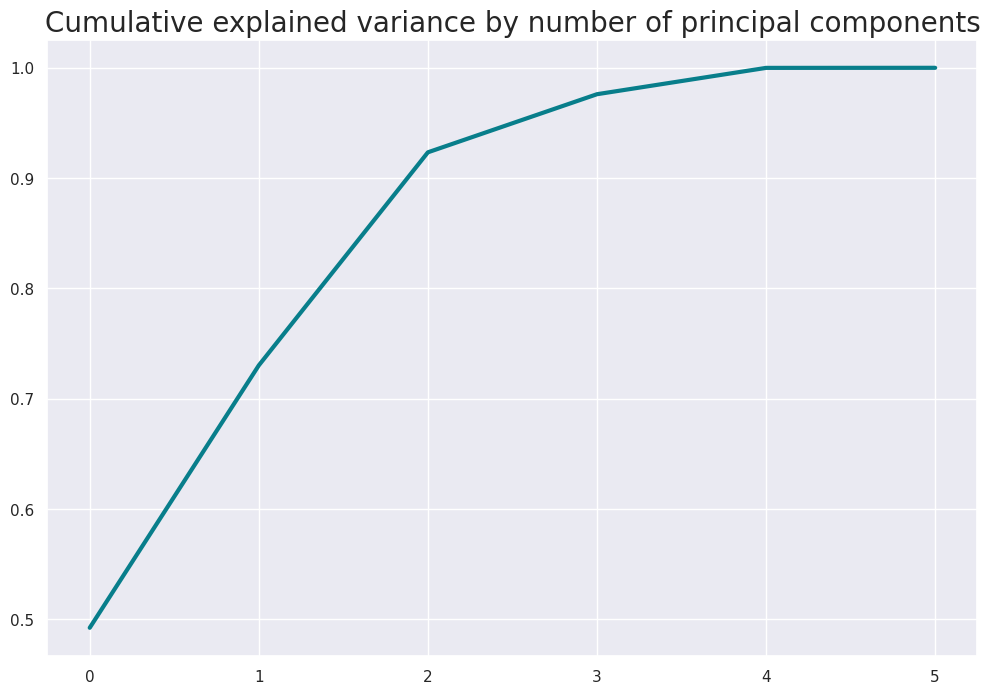

In [ ]:
# Use PCA to find the N
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)



# Plot the N and explained variance ratio

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [ ]:
# get the PCA loadings - coefficients of the linear combination of the original variables

loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)

In [ ]:
# View the PCA loadings
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Global_reactive_power,0.017955,0.016415,0.006156,0.006016,0.019294,0.107367
Voltage,-1.236336,-0.581005,-0.128387,-2.872061,0.484675,0.000016
Global_intensity,3.643891,1.680197,0.415514,0.403419,1.749694,-0.001081
Sub_metering_1,2.080496,4.784783,-3.109821,-0.469673,-0.530608,0.000110
Sub_metering_2,1.576583,2.743074,4.801877,-0.446670,-0.517665,0.000044
Sub_metering_3,7.914854,-2.668460,-0.350419,-0.421940,-0.487280,0.000219


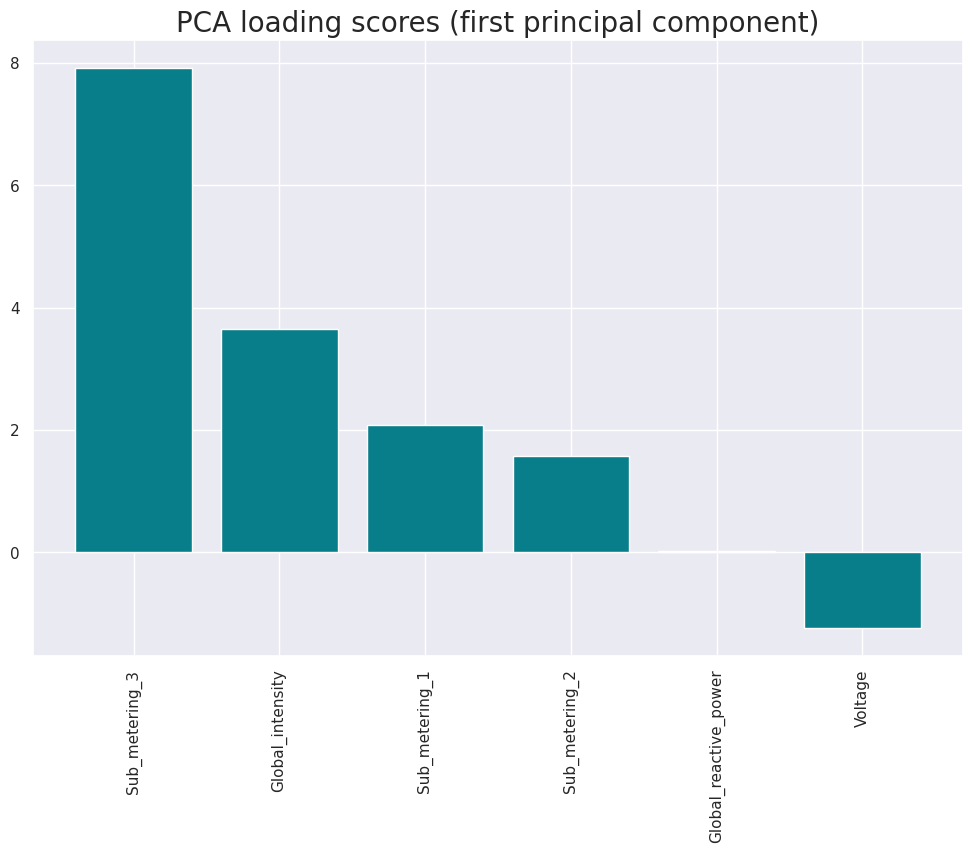

In [ ]:
# Visualize the correlations between all of the input features and the first principal components

pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# data splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Initialize the PCA
pca = PCA(n_components=2)

# fit and transform data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fitting the model
model_3 = LinearRegression()
model_3.fit(X_train_pca, y_train)


# Predict
y_pred =model_3.predict(X_test_pca)

# Evaluate the model based on R2 score
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("Prediction score after using PCA is",score)

Prediction score after using PCA is 0.828904924448761


# **5.Model Building & Evaluation**

## **Multiple Linear Regression**

In [ ]:
"""
Multiple Linear Regression allows for the incorporation of multiple independent variables that could potentially influence power consumption.
By using this technique, we can quantify the relationships between these variables and the power consumption.

Multiple Linear Regression works by estimating coefficients for each independent variable, which represent the change in the dependent variable
for a unit change in the corresponding independent variable, while considering the combined effects of all independent variables.

"""

'\nMultiple Linear Regression allows for the incorporation of multiple independent variables that could potentially influence power consumption. \nBy using this technique, we can quantify the relationships between these variables and the power consumption.\n\nMultiple Linear Regression works by estimating coefficients for each independent variable, which represent the change in the dependent variable\nfor a unit change in the corresponding independent variable, while considering the combined effects of all independent variables.\n\n'

In [ ]:
class linmodel():
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def pre_processing(self):
        cat = ['Date', 'Time']
        X = self.df.drop(cat+[self.target], axis=1).values
        Y = self.df[self.target].values

        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y,
                                                            test_size = 0.2,
                                                            random_state = 2)
        return self

    def fit_pred_acc(self):
        reg = LinearRegression()
        reg.fit(self.X_train, self.Y_train)
        pred = reg.predict(self.X_test)
        mae = round(skm.mean_absolute_error(self.Y_test, pred), 2)
        rmse = round(skm.mean_squared_error(self.Y_test, pred, squared=False), 2)
        r2_score = round(skm.r2_score(self.Y_test, pred), 4)
        ev = round(skm.explained_variance_score(self.Y_test, pred), 4)

        return [mae, rmse, r2_score, ev]

# Multiple Linear Regression model with Global_intensity

lin = linmodel(df, 'Global_active_power')
lin = lin.pre_processing()


models_with_GI = {}
models_without_GI = {}


models_with_GI["Mult_Reg"] = lin.fit_pred_acc()

In [ ]:
# Multiple Linear Regression model without Global_intensity

df_new = df.drop(['Global_intensity'], axis=1)

lin = linmodel(df_new, 'Global_active_power')
lin = lin.pre_processing()
models_without_GI["Mult_Reg"] = lin.fit_pred_acc()


## **Shrinkage Technique: Ridge**


In [ ]:
"""

Ridge regression utilizes L2 regularization to minimize the absolute values of the coefficients, thereby decreasing model complexity.
By adjusting the regularization parameter [⍺] we can control the level of complexity in our model.
When ⍺ is set to higher values, the coefficients are pushed closer to zero, resulting in a more constrained model.
This trade-off reduces the model's performance during training but enhances its ability to generalize well to unseen data.

"""

In [ ]:
class rdgmodel():
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def pre_processing(self):
        cat = ['Date', 'Time']
        X = self.df.drop(cat+[self.target], axis=1).values
        Y = self.df[self.target].values

        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y,
                                                            test_size = 0.2,
                                                            random_state = 2)
        return self

    def fit_pred_acc(self):
        reg = Ridge(alpha=0.0001)
        reg.fit(self.X_train, self.Y_train)
        pred = reg.predict(self.X_test)
        mae = round(skm.mean_absolute_error(self.Y_test, pred), 2)
        rmse = round(skm.mean_squared_error(self.Y_test, pred, squared=False), 2)
        r2_score = round(skm.r2_score(self.Y_test, pred), 4)
        ev = round(skm.explained_variance_score(self.Y_test, pred), 4)

        return [mae, rmse, r2_score, ev]

# Ridge with Global_intensity

rdg = rdgmodel(df, 'Global_active_power')
rdg = rdg.pre_processing()
models_with_GI["Ridge Reg"] = rdg.fit_pred_acc()

In [ ]:
# Ridge without Global_intensity

rdg = rdgmodel(df_new, 'Global_active_power')
rdg = rdg.pre_processing()
models_without_GI["Ridge Reg"] = rdg.fit_pred_acc()

## **Shrinkage Technique: Lasso**



In [ ]:
"""
Lasso regression uses L1 regularization to force some coefficients to be exactly zero.
This means some features are completely ignored by the model.
This can be thought of as a type of automatic feature selection

Lasso can be a good model choice when we have a large number of features but expect only a few to be important
This can make the model easier to interpret and reveal the most important features

"""

In [ ]:
class lasmodel():
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def pre_processing(self):
        cat = ['Date', 'Time']
        X = self.df.drop(cat+[self.target], axis=1).values
        Y = self.df[self.target].values

        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(X, Y,
                                                            test_size = 0.3,
                                                            random_state = 72)
        return self

    def fit_pred_acc(self):
        reg = Lasso()
        reg.fit(self.X_train, self.Y_train)
        pred = reg.predict(self.X_test)
        mae = round(skm.mean_absolute_error(self.Y_test, pred), 2)
        rmse = round(skm.mean_squared_error(self.Y_test, pred, squared=False), 2)
        r2_score = round(skm.r2_score(self.Y_test, pred), 4)
        ev = round(skm.explained_variance_score(self.Y_test, pred), 4)

        return [mae, rmse, r2_score, ev]

# Lasso with Global_intensity

las = lasmodel(df, 'Global_active_power')
las = las.pre_processing()
models_with_GI["Lasso Reg"] = las.fit_pred_acc()

In [ ]:
# Lasso without Global_intensity

las = lasmodel(df_new, 'Global_active_power')
las = las.pre_processing()
models_without_GI["Lasso Reg"] = las.fit_pred_acc()

In [ ]:
# Performance Evaluation of models with the Global_intensity feature
models_df = pd.DataFrame.from_dict(models_with_GI, orient='index',
                  columns=['MAE', 'RMSE', 'R_sq', 'Expl. Var.'])
models_df

,MAE,RMSE,R_sq,Expl. Var.
Mult_Reg,0.03,0.04,0.9985,0.9985
Ridge Reg,0.03,0.04,0.9985,0.9985
Lasso Reg,0.17,0.23,0.9509,0.9509


In [ ]:
# Performance Evaluation of models without the Global_intensity feature
models_df = pd.DataFrame.from_dict(models_without_GI, orient='index',
                  columns=['MAE', 'RMSE', 'R_sq', 'Expl. Var.'])
models_df

,MAE,RMSE,R_sq,Expl. Var.
Mult_Reg,0.36,0.54,0.7396,0.7396
Ridge Reg,0.36,0.54,0.7396,0.7396
Lasso Reg,0.43,0.61,0.6640,0.6640


# **The XGBoost**

### **Finding the pattern of cyclical data**
Applying the XGBoost regressor to process the analysis.

**Why XGBoost?**


The reason for the choosing of the XGBoost is as there existed a cyclical pattern in the dataset. After some literature review we identified for cyclical pattern in the data XGBoost algorithms work better.

In [ ]:
import pandas as pd
df = pd.read_csv('household_power_consumption.txt', sep=';',
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], )


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   dt                     datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [ ]:
df.isnull().sum()

dt                           0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
newdf = df.fillna(method='ffill')

In [ ]:
newdf.isnull().sum()

dt                       0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   dt                     datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
#preprocessing
#finding the missing value and transforming the data by imputing
newdf.replace(['?', 'nan', np.nan], -1, inplace=True)
newdf['Global_active_power'] = pd.to_numeric(newdf['Global_active_power'])
imp = SimpleImputer(missing_values=-1, strategy='mean')
num_vars= ['Global_active_power']
newdf[num_vars] = imp.fit_transform(newdf[num_vars])
#df['DateTime']=pd.to_datetime(df['DateTime'])


In [ ]:
newdf.head()

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
data = newdf[['dt', 'Global_active_power']]
data.dtypes
data.head()

,dt,Global_active_power
0,2006-12-16 17:24:00,4.216
1,2006-12-16 17:25:00,5.360
2,2006-12-16 17:26:00,5.374
3,2006-12-16 17:27:00,5.388
4,2006-12-16 17:28:00,3.666


count    2.075259e+06
mean     1.086168e+00
std      1.053172e+00
min      7.600000e-02
25%      3.080000e-01
50%      5.980000e-01
75%      1.524000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64


<ipython-input-52-1132b41e5ef5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.Global_active_power)


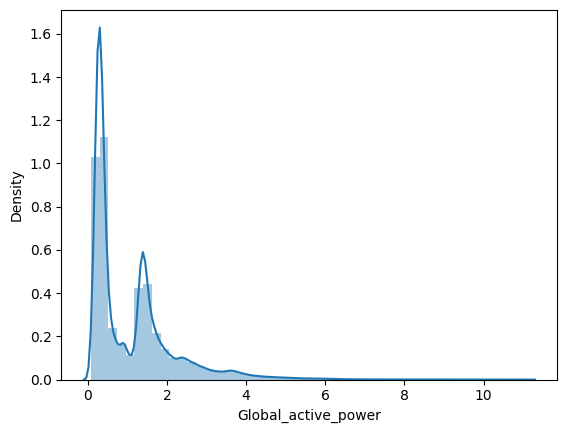

In [ ]:
#plotting the graph to check the cyclical pattern of the target variable
import seaborn as sns
print(data.Global_active_power.describe())
ax = sns.distplot(data.Global_active_power)

<ipython-input-53-98eb1ccf953a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data.dt.dt.hour


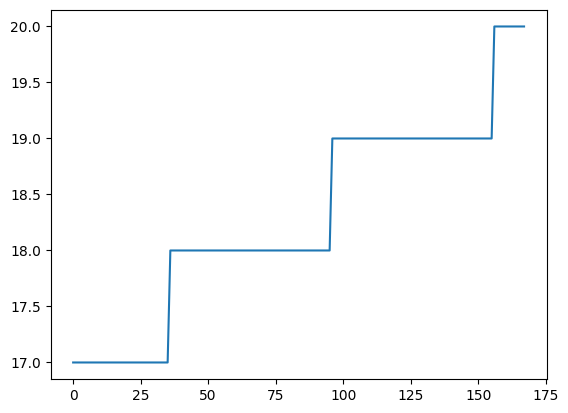

In [ ]:
data['hour'] = data.dt.dt.hour
sample = data[:168] # roughly the first week of the data
ax = sample['hour'].plot()

### **Performing the XGBoost**
"A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation."

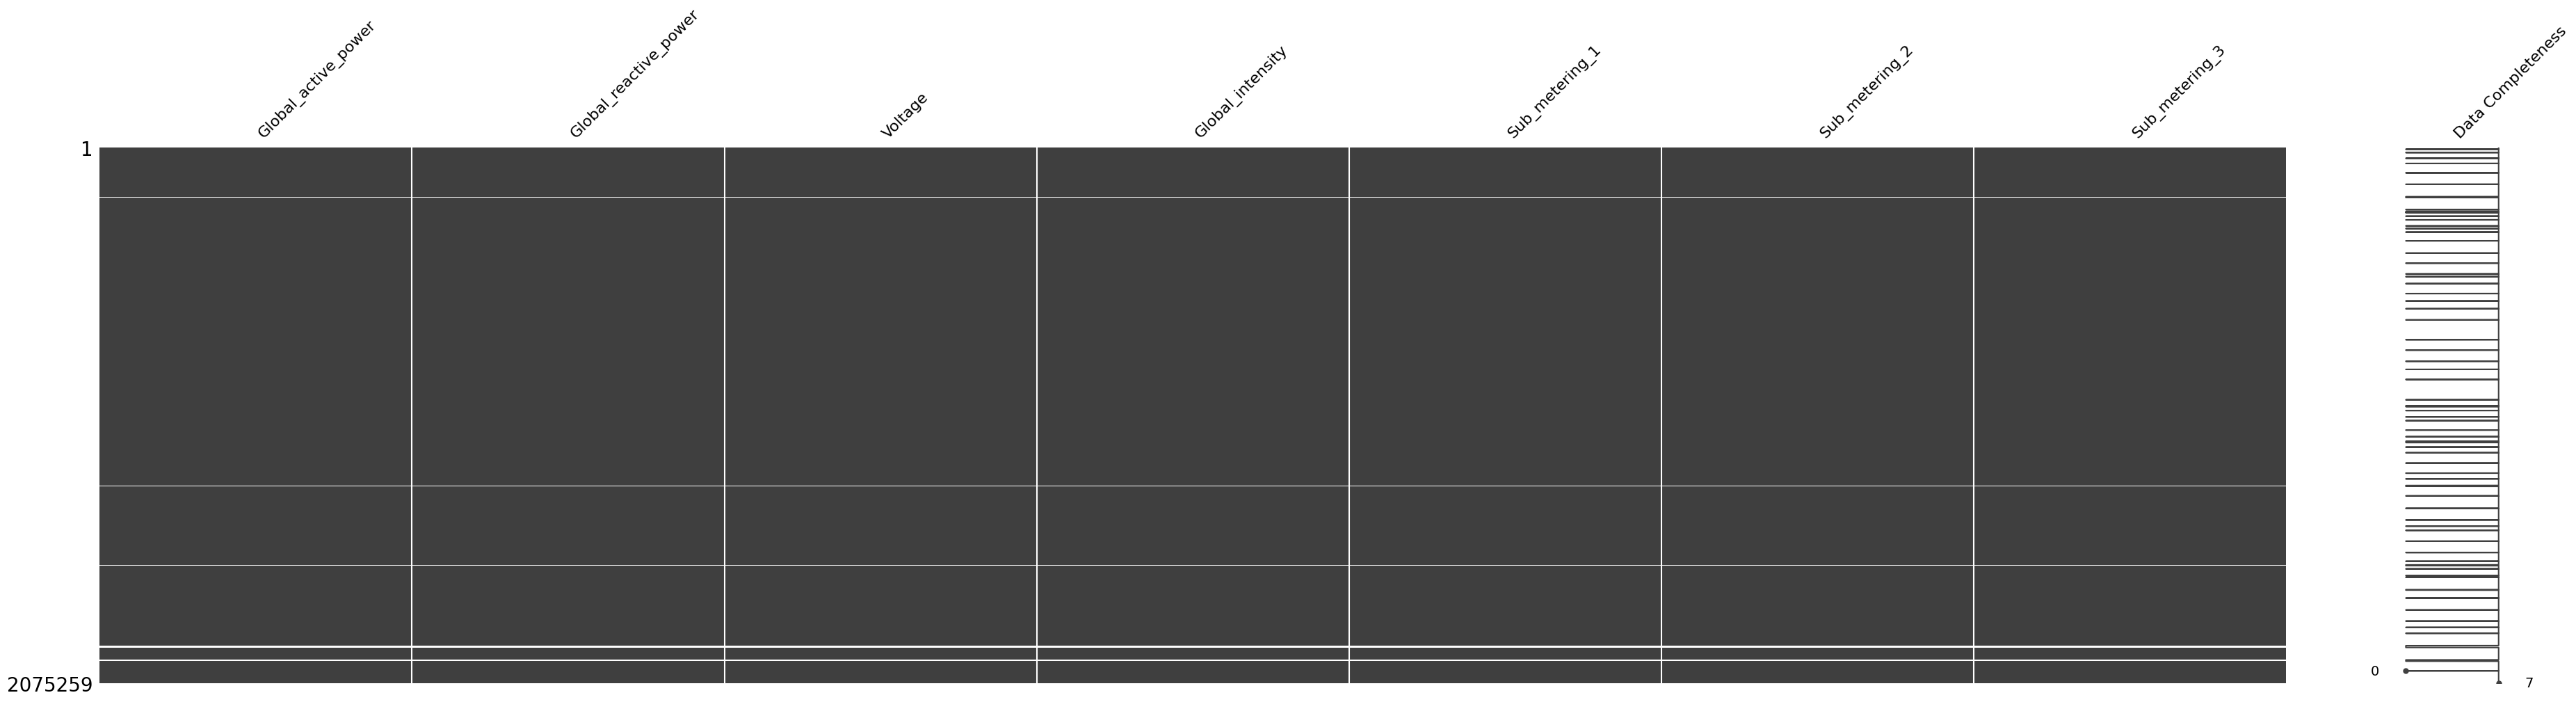

In [ ]:
df = pd.read_csv('household_power_consumption.txt', sep=';',
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')
df.isnull().sum()
import missingno as msno
msno.matrix(df, labels=True,figsize=(45,10))
newdf = df.fillna(method='ffill')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
df.drop(['Global_intensity'],axis=1)

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,0.0,1.0,17.0
...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,0.0,0.0,0.0


Encoding Cyclical Features

In [ ]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    data.drop(col,axis=1,inplace = True)
    return data

Set 15 minutes as a lagging time unit, therefore lagging time will be 15 min * n, such as 15 min, 30 min, 1 hour and so on.
The smaller this lagging time unit is, the better the predicting result is.

In [ ]:


def get_lag(data, col, lagtime):
    for i in range(1,lagtime+1):
        if len(pd.Series(col)) == 1:
            data[col+"_lag"+str(i)] = data[col].shift(i*15)
        else:
            for col_j in col:
                data[col_j+"_lag"+str(i)] = data[col_j].shift(i*15)
    return data

In [ ]:
# Create Time Series Features

newdf = df

newdf['date'] = newdf.index

newdf['hour'] = newdf['date'].dt.hour
newdf = encode(newdf,'hour',24)

newdf['dayofweek'] = newdf['date'].dt.dayofweek
newdf = encode(newdf,'dayofweek',7)

newdf['month'] = newdf['date'].dt.month
newdf = encode(newdf,'month',12)

# newdf['year'] = newdf['date'].dt.year

newdf['dayofyear'] = newdf['date'].dt.dayofyear
newdf = encode(newdf,'dayofyear',365)

newdf['dayofmonth'] = newdf['date'].dt.day
newdf = encode(newdf,'dayofmonth',31)

#newdf['weekofyear'] = newdf['date'].dt.weekofyear

newdf.drop('date',axis=1,inplace = True)

In [ ]:
# adding lagging feature

# adding time lags of 15min,30min as features

lagtime = 2
lag_feature = ['Global_reactive_power','Voltage', 'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
newdf = get_lag(newdf, lag_feature, lagtime)

# adding time lags of 2 hours as features

newdf = get_lag(newdf, 'Global_active_power', 8)

newdf.drop(lag_feature,axis=1,inplace = True)

newdf.dropna(inplace=True)

In [ ]:
newdf.head()

,Global_active_power,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos,dayofyear_sin,dayofyear_cos,dayofmonth_sin,...,Sub_metering_2_lag2,Sub_metering_3_lag2,Global_active_power_lag1,Global_active_power_lag2,Global_active_power_lag3,Global_active_power_lag4,Global_active_power_lag5,Global_active_power_lag6,Global_active_power_lag7,Global_active_power_lag8
dt,,,,,,,,,,,,,,,,,,,,,
2006-12-16 19:24:00,3.262,-0.965926,0.258819,-0.974928,-0.222521,-2.449294e-16,1.0,-0.255353,0.966848,-0.101168,...,1.0,16.0,3.394,4.298,2.326,3.452,4.464,2.720,3.384,4.216
2006-12-16 19:25:00,3.476,-0.965926,0.258819,-0.974928,-0.222521,-2.449294e-16,1.0,-0.255353,0.966848,-0.101168,...,1.0,17.0,3.400,4.230,2.264,4.870,3.396,3.758,3.270,5.360
2006-12-16 19:26:00,3.620,-0.965926,0.258819,-0.974928,-0.222521,-2.449294e-16,1.0,-0.255353,0.966848,-0.101168,...,2.0,16.0,3.414,4.230,2.270,4.868,3.090,4.342,3.430,5.374
2006-12-16 19:27:00,3.610,-0.965926,0.258819,-0.974928,-0.222521,-2.449294e-16,1.0,-0.255353,0.966848,-0.101168,...,1.0,17.0,3.432,3.924,2.258,4.866,3.730,4.512,3.266,5.388
2006-12-16 19:28:00,3.646,-0.965926,0.258819,-0.974928,-0.222521,-2.449294e-16,1.0,-0.255353,0.966848,-0.101168,...,1.0,17.0,3.418,4.218,2.188,3.176,2.308,4.058,3.728,3.666


In [ ]:
split_date =pd.to_datetime( '2007-12-17')
df_train = newdf.loc[newdf.index <= split_date].copy()
df_train.shape

(521262, 31)

In [ ]:
#df_test = pd.DataFrame(newdf.loc[newdf.index > split_date]
df_test = pd.DataFrame(newdf.loc[newdf.index > split_date][:5000])

df_test.shape

(5000, 31)

In [ ]:
# The target is forecasting Global_active_power.
X_train, y_train = df_train.iloc[:,1:],df_train.iloc[:,0]
X_test, y_test = df_test.iloc[:,1:],df_test.iloc[:,0]

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.05845	validation_1-rmse:1.24056
[1]	validation_0-rmse:0.89723	validation_1-rmse:1.02242
[2]	validation_0-rmse:0.80214	validation_1-rmse:0.89463
[3]	validation_0-rmse:0.74830	validation_1-rmse:0.81791
[4]	validation_0-rmse:0.71861	validation_1-rmse:0.77787
[5]	validation_0-rmse:0.69847	validation_1-rmse:0.74974
[6]	validation_0-rmse:0.68792	validation_1-rmse:0.73523
[7]	validation_0-rmse:0.68024	validation_1-rmse:0.72427
[8]	validation_0-rmse:0.67460	validation_1-rmse:0.72063
[9]	validation_0-rmse:0.67040	validation_1-rmse:0.71555
[10]	validation_0-rmse:0.66704	validation_1-rmse:0.71382
[11]	validation_0-rmse:0.66316	validation_1-rmse:0.71329
[12]	validation_0-rmse:0.66086	validation_1-rmse:0.71042
[13]	validation_0-rmse:0.65805	validation_1-rmse:0.70893
[14]	validation_0-rmse:0.65650	validation_1-rmse:0.70767
[15]	validation_0-rmse:0.65340	validation_1-rmse:0.70321
[16]	validation_0-rmse:0.65162	validation_1-rmse:0.70146
[17]	validation_0-rmse:0.65024	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

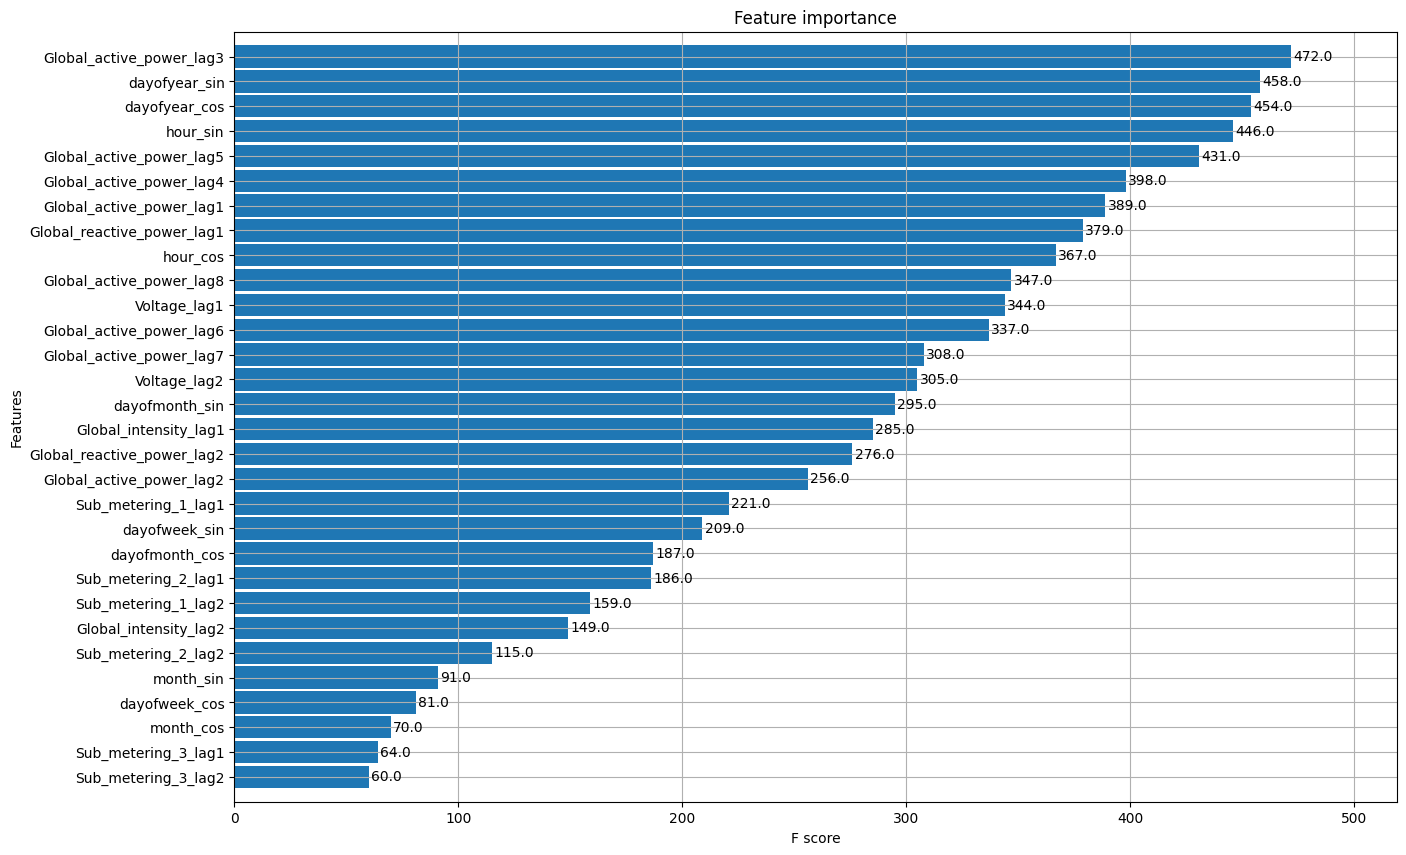

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15,10))
_ = plot_importance(reg, height=0.9,ax = ax)
plt.show()

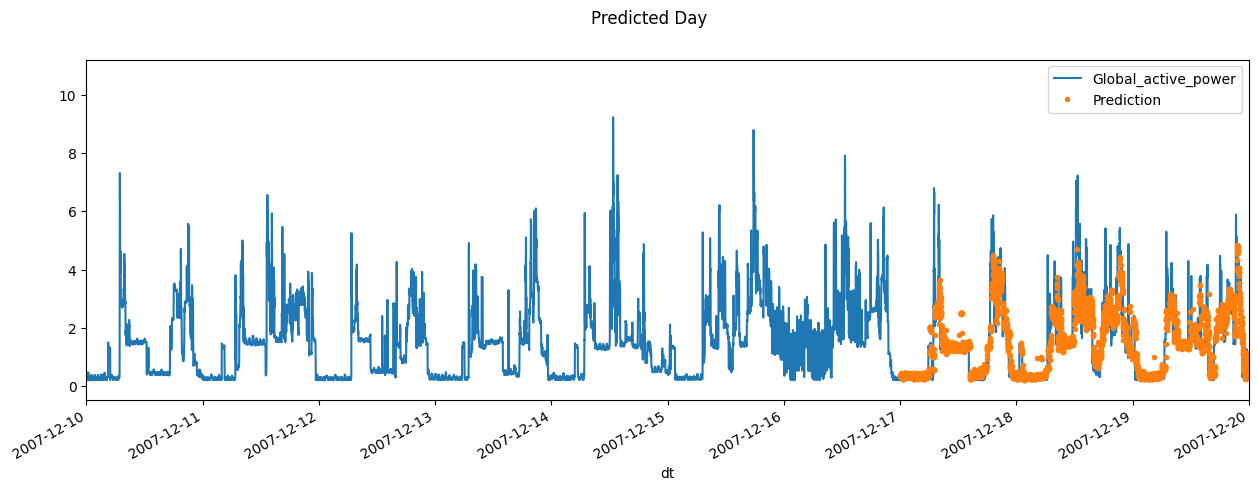

In [ ]:
df_test['Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['Global_active_power','Prediction']].plot(ax=ax,style=['-','.'])
ax.set_xbound(lower='12-10-2007', upper='12-20-2007')
plot = plt.suptitle('Predicted Day')
plt.show()

In [ ]:
np.sqrt(mean_squared_error(df_test['Prediction'], df_test['Global_active_power']))

0.687663864847101

# **Conclusion and Summary**

The dataset was performed with the various model and some techniques in the model used in this regresssion analysis problem.

After the initial steps of the analysis there was a baseline model developed with two version of having one attribute in the dataset and other version without that attribute. The attribute decided to choose for this approach is Global Intensity. Global Intensity was decided to choose as a result of value of the correlation matrix. This approach showed a significant improvement in the result as well.


After the base model we tried multiple linear regression as well including the shrinkage techniques like Lasso and Rigid. The result of them were given in the tabular form.

When analysing the data set thoroughly we were able to identify the cyclical pattern in the dataset as the dataset had the datetime attribute. After some Literature review we processed the XG Boost algorithm in the dataset by changing the attribute of the data to sine and cosine.


# **Reference**

Links to look

https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set


https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

https://towardsdatascience.com/mastering-linear-regression-the-definitive-guide-for-aspiring-data-scientists-7abd37fcb9ed

https://towardsdatascience.com/cross-validation-430d9a5fee22

https://scikit-learn.org/stable/modules/cross_validation.html

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
